# Laboratory on Statistical Inference
In this laboratory, we will see the main tools to perform statistical inference. We will contextualize better these tools with real data analysis later.

## Sampling
In Python we can easily sample from known distributions using numpy `random` module, as shown in the example below:

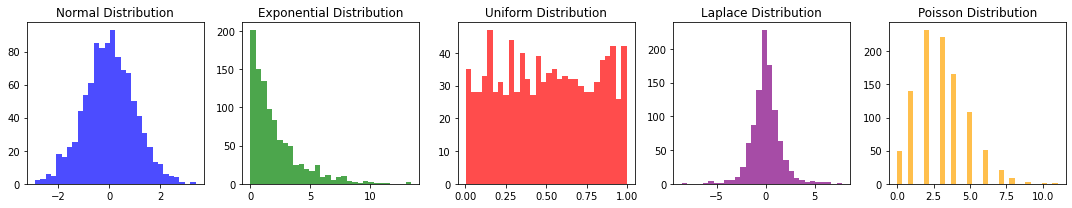

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Set the sample size
sample_size = 1000

# Sample from the Normal (Gaussian) Distribution
mean_normal = 0
std_dev_normal = 1
samples_normal = np.random.normal(mean_normal, std_dev_normal, sample_size)

# Sample from the Exponential Distribution
rate_exponential = 0.5
samples_exponential = np.random.exponential(1/rate_exponential, sample_size)

# Sample from the Uniform Distribution
low_uniform = 0
high_uniform = 1
samples_uniform = np.random.uniform(low_uniform, high_uniform, sample_size)

# Sample from the Laplace Distribution
loc_laplace = 0
scale_laplace = 1
samples_laplace = np.random.laplace(loc_laplace, scale_laplace, sample_size)

# Sample from the Poisson Distribution
lam_poisson = 3
samples_poisson = np.random.poisson(lam_poisson, sample_size)

# Create histograms to visualize the distributions
plt.figure(figsize=(15, 3))

plt.subplot(1, 5, 1)
plt.hist(samples_normal, bins=30, color='blue', alpha=0.7)
plt.title('Normal Distribution')

plt.subplot(1, 5, 2)
plt.hist(samples_exponential, bins=30, color='green', alpha=0.7)
plt.title('Exponential Distribution')

plt.subplot(1, 5, 3)
plt.hist(samples_uniform, bins=30, color='red', alpha=0.7)
plt.title('Uniform Distribution')

plt.subplot(1, 5, 4)
plt.hist(samples_laplace, bins=30, color='purple', alpha=0.7)
plt.title('Laplace Distribution')

plt.subplot(1, 5, 5)
plt.hist(samples_poisson, bins=30, color='orange', alpha=0.7)
plt.title('Poisson Distribution')

plt.tight_layout()
plt.show()


We can also sample from an existing sample to obtain a **subsample**. This can be done starting from a dataset. For instance, let us consider the *weight-height* dataset:

In [51]:
import pandas as pd
data=pd.read_csv('http://antoninofurnari.it/downloads/height_weight.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     4231 non-null   object 
 1   BMI     4231 non-null   float64
 2   height  4231 non-null   float64
 3   weight  4231 non-null   float64
dtypes: float64(3), object(1)
memory usage: 132.3+ KB


,sex,BMI,height,weight
0,M,33.36,187.96,117.933920
1,M,26.54,177.80,83.914520
2,F,32.13,154.94,77.110640
3,M,26.62,172.72,79.378600
4,F,27.13,167.64,76.203456


We can obtain a subsample of 1000 observations as follows:

In [52]:
sample1=data.sample(1000)
sample1.info()
sample1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 2885 to 3152
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     1000 non-null   object 
 1   BMI     1000 non-null   float64
 2   height  1000 non-null   float64
 3   weight  1000 non-null   float64
dtypes: float64(3), object(1)
memory usage: 39.1+ KB


,sex,BMI,height,weight
2885,M,28.90,172.72,86.18248
506,F,23.15,162.56,61.23492
1771,F,44.59,162.56,117.93392
162,M,25.06,170.18,72.57472
969,M,25.84,175.26,79.37860


Sampling will be random. As can be seen the indexes of the rows are shuffled. By default, Pandas will sample without replacement. We can sample with replacement specifying `replace=True`. For instance, we can obtain a larger sample (with repetitions) as follows:

In [17]:
sample2=data.sample(5000, replace=True)
sample2.info()
sample2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1633 to 3834
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     5000 non-null   object 
 1   BMI     5000 non-null   float64
 2   height  5000 non-null   float64
 3   weight  5000 non-null   float64
dtypes: float64(3), object(1)
memory usage: 195.3+ KB


,sex,BMI,height,weight
1633,F,27.46,162.56,72.57472
4001,F,26.62,170.18,77.11064
4199,M,23.76,193.04,88.45044
1405,M,21.79,167.64,61.23492
1478,F,34.96,165.10,95.25432


We expect the samples to show similar distributions. Let's check it:

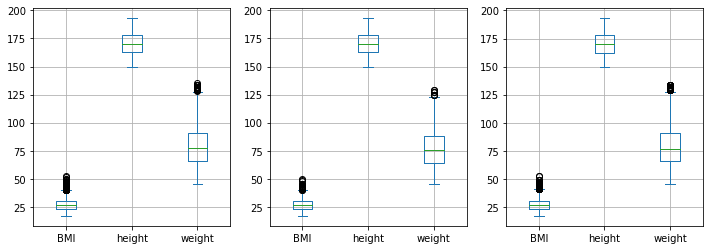

In [23]:
plt.figure(figsize=(12,4))
data.plot.box(ax=plt.subplot(131))
plt.grid()
sample1.plot.box(ax=plt.subplot(132))
plt.grid()
sample2.plot.box(ax=plt.subplot(133))
plt.grid()

Alternatively, we can sample using `np.random.choice`:

In [32]:
sample3=data.iloc[np.random.choice(len(data),100, replace=False)]
sample3.info()
sample3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 2882 to 4213
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     100 non-null    object 
 1   BMI     100 non-null    float64
 2   height  100 non-null    float64
 3   weight  100 non-null    float64
dtypes: float64(3), object(1)
memory usage: 3.9+ KB


,sex,BMI,height,weight
2882,F,23.15,162.56,61.234920
2278,M,25.85,167.64,72.574720
983,F,39.45,162.56,104.326160
855,F,20.37,170.18,58.966960
2859,F,28.91,167.64,81.192968


Note that, bu default `np.random.choice` will set `replace=True`. We can perform stratified sampling as follows:

In [30]:
# Define the stratification variable (e.g., 'Gender')
strata_variable = 'sex'

# Number of samples per stratum
samples_per_stratum = 500

# Perform stratified sampling
stratified_sample = data.groupby(strata_variable, group_keys=False).apply(lambda x: x.sample(samples_per_stratum))

stratified_sample.info()
stratified_sample.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 377 to 1705
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     1000 non-null   object 
 1   BMI     1000 non-null   float64
 2   height  1000 non-null   float64
 3   weight  1000 non-null   float64
dtypes: float64(3), object(1)
memory usage: 39.1+ KB


,sex,BMI,height,weight
377,F,23.30,165.10,63.502880
4129,F,28.72,152.40,66.678024
3291,F,30.78,165.10,83.914520
2622,F,25.19,152.40,58.513368
2572,F,24.21,167.64,68.038800


Note that, with this method, sampled observations will be sorted by `sex`. To get rid of this bias, we can shuffle the dataframe as follows:

In [33]:
stratified_sample = stratified_sample.iloc[np.random.choice(len(stratified_sample), len(stratified_sample), replace=False)]
stratified_sample.head()

,sex,BMI,height,weight
3883,M,21.70,182.88,72.57472
1686,F,29.28,152.40,68.03880
3134,F,24.95,165.10,68.03880
1778,M,24.41,185.42,83.91452
25,F,27.46,162.56,72.57472


Males and females will be perfectly balanced by design in this stratified sample:

In [34]:
stratified_sample['sex'].value_counts()

M    500
F    500
Name: sex, dtype: int64

## Confidence Intervals
Let us see how to compute confidence intervals in Python.

### Confidence Intervals for Means
We can compute confidence intervals for the estimation of means with `scipy`. Let us see how to compute confidence intervals for the mean of `height`:

In [47]:
from scipy import stats
mean = data['height'].mean()
std = np.std(data['height'])
standard_error = std/np.sqrt(len(data))

confidence_level = 0.95

interval = stats.norm.interval(confidence_level, loc=mean, scale=standard_error)

print(f"Estimated mean: {mean:0.2f}")
print(f"Standard deviation of the sample: {std:0.2f}")
print(f"Standard error of the sample: {standard_error:0.2f}")
print(f"Confidence interval: [{interval[0]:0.2f}, {interval[1]:0.2f}]")

Estimated mean: 169.89
Standard deviation of the sample: 9.96
Standard error of the sample: 0.15
Confidence interval: [169.59, 170.19]


Let us set the confidence level to $0.99$:

In [53]:
from scipy import stats
mean = data['height'].mean()
std = np.std(data['height'])
standard_error = std/np.sqrt(len(data))

confidence_level = 0.99

interval = stats.norm.interval(confidence_level, loc=mean, scale=standard_error)

print(f"Estimated mean: {mean:0.2f}")
print(f"Standard deviation of the sample: {std:0.2f}")
print(f"Standard error of the sample: {standard_error:0.2f}")
print(f"Confidence interval: [{interval[0]:0.2f}, {interval[1]:0.2f}]")

Estimated mean: 169.89
Standard deviation of the sample: 9.96
Standard error of the sample: 0.15
Confidence interval: [169.50, 170.29]


### Confidence Intervals for Variances

To compute confidence intervals for the estimation of variances, we have to use the $\chi^2$ distribution:

In [54]:
import numpy as np
from scipy import stats

# Set the desired confidence level
confidence_level = 0.95  # Change this to the desired confidence level (e.g., 0.95 for 95% confidence)

# Calculate the confidence interval for the population variance
confidence_interval = stats.chi2.interval(confidence_level, df=len(data) - 1)

# Calculate the sample variance
sample_variance = np.var(data['height'], ddof=1)  # ddof=1 for sample variance

# Calculate the lower and upper bounds of the confidence interval
variance_lower = (len(data) - 1) * sample_variance / confidence_interval[1]
variance_upper = (len(data) - 1) * sample_variance / confidence_interval[0]

print(f"Sample Variance: {sample_variance:.2f}")
print(f"Confidence Interval for Variance: ({variance_lower:.2f}, {variance_upper:.2f})")


Sample Variance: 99.13
Confidence Interval for Variance: (95.04, 103.49)


### Confidence Intervals for Proportion

Let us see how to compute confidence intervals for the proportion of females over males:

In [57]:
import statsmodels.api as sm
import numpy as np

females = data['sex'].value_counts()['F']
total = len(data)

# Set the desired confidence level
confidence_level = 0.95  # Change this to the desired confidence level (e.g., 0.95 for 95% confidence)

# Calculate the proportion (sample proportion)
proportion = females / total

# Compute the confidence interval for the proportion
conf_interval = sm.stats.proportion_confint(females, total, alpha=1 - confidence_level, method='normal')

print(f"Sample Proportion: {proportion:.2f}")
print(f"Confidence Interval for Proportion: ({conf_interval[0]:.2f}, {conf_interval[1]:.2f})")


Sample Proportion: 0.54
Confidence Interval for Proportion: (0.53, 0.56)


## Hypothesis Testing
Let us see now the main hypothesis tests.

### One sample t-test
This test allows to assess whether a sample has a given mean. Let us check if the average height in our dataset is equal to $170cm$:

In [59]:
import numpy as np
from scipy import stats

# Define the null hypothesis mean (population mean you want to test against)
null_hypothesis_mean = 170

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(data['height'], null_hypothesis_mean)

# Set the desired significance level (alpha)
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    print(f"Reject the null hypothesis. The data provides enough evidence to conclude that the population mean is different from {null_hypothesis_mean}.")
else:
    print(f"Fail to reject the null hypothesis. The data does not provide enough evidence to conclude that the population mean is different from {null_hypothesis_mean}.")

print(f"t-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")


Fail to reject the null hypothesis. The data does not provide enough evidence to conclude that the population mean is different from 170.
t-statistic: -0.69
P-value: 0.4872


Let us now check if the average height is $170$ among males only:

In [60]:
import numpy as np
from scipy import stats

# Define the null hypothesis mean (population mean you want to test against)
null_hypothesis_mean = 170

data2 = data[data['sex']=='M']

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(data2['height'], null_hypothesis_mean)

# Set the desired significance level (alpha)
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    print(f"Reject the null hypothesis. The data provides enough evidence to conclude that the population mean is different from {null_hypothesis_mean}.")
else:
    print(f"Fail to reject the null hypothesis. The data does not provide enough evidence to conclude that the population mean is different from {null_hypothesis_mean}.")

print(f"t-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")


Reject the null hypothesis. The data provides enough evidence to conclude that the population mean is different from 170.
t-statistic: 45.52
P-value: 0.0000


### Two-sample t-test

Let us now check if males and females have the same average height:

In [62]:
import scipy.stats as stats

male_h = data[data['sex']=='M']['height']
female_h = data[data['sex']=='F']['height']

# Perform independent two-sample t-test
t_stat, p_value = stats.ttest_ind(male_h, female_h)

# Define significance level (alpha)
alpha = 0.05

print(f"Test statistic: {t_stat:0.2f}")
print(f"Significance level: {alpha:0.2f}")
print(f"P-value: {p_value:0.2f}")

# Comment on result
if p_value < alpha:
    print("Conclusion: there is a significant difference between the mean exam scores of the two classes.")
else:
    print("Conclusion: there is no significant difference between the mean exam scores of the two classes.")


Test statistic: 66.95
Significance level: 0.05
P-value: 0.00
Conclusion: there is a significant difference between the mean exam scores of the two classes.


Let us now compare the average heights in two samples we previously obtained via random sampling. We expect no differences:

In [63]:
import scipy.stats as stats

h1 = sample1['height']
h2 = sample2['height']

# Perform independent two-sample t-test
t_stat, p_value = stats.ttest_ind(h1, h2)

# Define significance level (alpha)
alpha = 0.05

print(f"Test statistic: {t_stat:0.2f}")
print(f"Significance level: {alpha:0.2f}")
print(f"P-value: {p_value:0.2f}")

# Comment on result
if p_value < alpha:
    print("Conclusion: there is a significant difference between the mean exam scores of the two classes.")
else:
    print("Conclusion: there is no significant difference between the mean exam scores of the two classes.")


Test statistic: -0.18
Significance level: 0.05
P-value: 0.86
Conclusion: there is no significant difference between the mean exam scores of the two classes.


### Chi-square test of independence
Let us consider the Titanic dataset:

In [64]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv',
                     index_col='PassengerId')
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


We want to check if `Sex` and `Survived` are independent. Let us see the contingency table:

In [66]:
contingency_table = pd.crosstab(titanic['Sex'], titanic['Survived'])
contingency_table

Survived,0,1
Sex,,
female,81,233
male,468,109


Let us visualize the result:

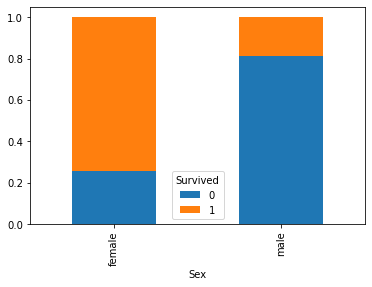

In [71]:
pd.crosstab(titanic['Sex'], titanic['Survived'], normalize=0).plot.bar(stacked=True)
plt.show()

We expect some form of correlation. Indeed, if we compute Pearson $\chi^2$ statistic and Cramer V statistic, we obtain:

In [72]:
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

print(f"Chi-square statistic: {chi2_contingency(contingency_table).statistic:0.2f}")
print(f"Cramer V statistic: {association(contingency_table):0.2f}")

Chi-square statistic: 260.72
Cramer V statistic: 0.54


Let us check if this is statistically significant with a $\chi^2$ test of independence:

In [74]:
from scipy.stats import chi2_contingency

# Perform the Chi-Square Test for Independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

# Interpret the results
if p < alpha:
    print("\nThere is a significant association between 'Sex' and 'survived'.")
else:
    print("\nThere is no significant association between 'Sex' and 'survived'.")


Chi-Square Statistic: 260.71702016732104
p-value: 1.1973570627755645e-58

There is a significant association between 'Sex' and 'survived'.


### Chi-Square Goodness-of-Fit Test

The Chi-Square Goodness of Fit test allows to determine whether observed frequencies fit a specified distribution or expected frequencies. 

As we can imagine, the distribution of `sex` in the Titanic dataset is not uniform:

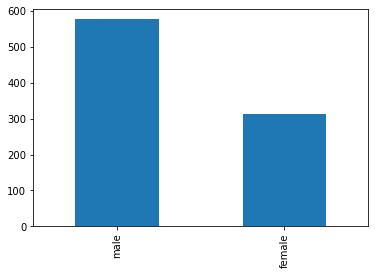

In [84]:
titanic['Sex'].value_counts().plot.bar()
plt.show()

The counts of males and females are:

In [87]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

This difference is probably not just due to sampling. Let us run a $\chi^2$ goodness of fit test to check if this distribution is significantly different from the uniform distribution of frequencies:

In [88]:
import seaborn as sns
import pandas as pd
from scipy.stats import chisquare

observed_frequencies = titanic['Sex'].value_counts().values

# Define expected frequencies that closely match the observed data
expected_frequencies = [observed_frequencies.mean()]*2

chi2, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("Observed Frequencies:")
print(observed_frequencies)
print("\nExpected Frequencies:")
print(expected_frequencies)
print("\nChi-Square Statistic:", chi2)
print("p-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("\nThe observed data significantly deviates from the expected distribution.")
else:
    print("\nThe observed data fits the expected distribution.")


Observed Frequencies:
[577 314]

Expected Frequencies:
[445.5, 445.5]

Chi-Square Statistic: 77.63075196408529
p-value: 1.2422095313910336e-18

The observed data significantly deviates from the expected distribution.


As expected, there is a significant deviation. As seen in the lecture, let us now check if `sex` is equally distributed among kids:

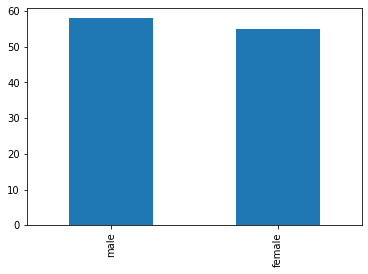

male      58
female    55
Name: Sex, dtype: int64

In [89]:
minor=titanic[titanic['Age']<18]
observed_frequencies = minor['Sex'].value_counts()
observed_frequencies.plot.bar()
plt.show()
observed_frequencies

This looks less biased, but there are still minor differences between the counts. Are these due to chance? Let us run a $\chi^2$ goodness of fit test:

In [90]:
import seaborn as sns
import pandas as pd
from scipy.stats import chisquare

# Load the Titanic dataset
titanic_data = sns.load_dataset("titanic")

observed_frequencies = minor['Sex'].value_counts().values

# Define expected frequencies that closely match the observed data
expected_frequencies = [113/2, 113/2]

chi2, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("Observed Frequencies:")
print(observed_frequencies)
print("\nExpected Frequencies:")
print(expected_frequencies)
print("\nChi-Square Statistic:", chi2)
print("p-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("\nThe observed data significantly deviates from the expected distribution.")
else:
    print("\nThe observed data fits the expected distribution.")


Observed Frequencies:
[58 55]

Expected Frequencies:
[56.5, 56.5]

Chi-Square Statistic: 0.07964601769911504
p-value: 0.7777776907897473

The observed data fits the expected distribution.


Since the p-value is large, we could not reject the null hypothesis and we can conclude that there is no significant difference between observed and expected frequencies.

### Pearson/Spearman/Kendall Correlation Test
We can easily compute correlation coefficients and the p-value of the related statistical tests using `scipy`. Let us see some examples:

In [95]:
from scipy.stats import pearsonr, spearmanr, kendalltau

pr, pr_pvalue = pearsonr(data['weight'], data['height'])
sr, sr_pvalue = spearmanr(data['weight'], data['height'])
kt, kt_pvalue = kendalltau(data['weight'], data['height'])

print(f"Person r: {pr:0.2f}. P-value: {pr_pvalue:0.2f}")
print(f"Spearman r: {sr:0.2f}. P-value: {sr_pvalue:0.2f}")
print(f"Kendall Tau r: {kt:0.2f}. P-value: {kt_pvalue:0.2f}")

Person r: 0.52. P-value: 0.00
Spearman r: 0.53. P-value: 0.00
Kendall Tau r: 0.39. P-value: 0.00


All correlations are statistically relevant. Let us now check if there is a significant correlation between `Age` and `Fare`. Let us first visualize the scatterplot:

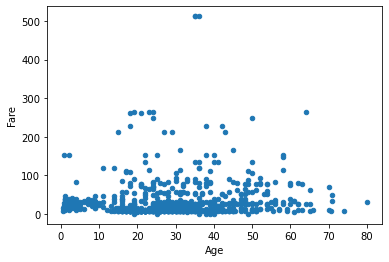

In [100]:
titanic.plot.scatter(x='Age', y='Fare')
plt.show()

It looks like there is no correlation. If we compute Pearson correlation coefficient, we get a value close to zero:

In [102]:
pr, _ = pearsonr(titanic.dropna()['Age'], titanic.dropna()['Fare'])
print(f"{pr:0.2f}")

-0.09


Is this a small negative correlation, or is this value due to chance? Let us have a look at p-values:

In [103]:
pr, pr_pvalue = pearsonr(titanic.dropna()['Age'], titanic.dropna()['Fare'])
sr, sr_pvalue = spearmanr(titanic.dropna()['Age'], titanic.dropna()['Fare'])
kt, kt_pvalue = kendalltau(titanic.dropna()['Age'], titanic.dropna()['Fare'])

print(f"Person r: {pr:0.2f}. P-value: {pr_pvalue:0.2f}")
print(f"Spearman r: {sr:0.2f}. P-value: {sr_pvalue:0.2f}")
print(f"Kendall Tau r: {kt:0.2f}. P-value: {kt_pvalue:0.2f}")

Person r: -0.09. P-value: 0.21
Spearman r: -0.08. P-value: 0.31
Kendall Tau r: -0.05. P-value: 0.31


P-values are large ($>0.05$), so whatever we measured as a correlation is not reliable.

## Normality Tests

We can check for the normality of sample using Q-Q plots and normality tests. Let us see a Q-Q plot to check if `BMI` is normally distributed:

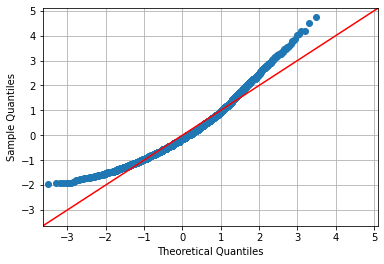

In [107]:
from statsmodels.graphics.gofplots import qqplot
import pandas as pd
from matplotlib import pyplot as plt

qqplot(data['BMI'], fit=True, line='45')
plt.grid()
plt.show()

We see deviations due to a skewed distribution. Let us check this against the density plot:

<AxesSubplot:ylabel='Density'>

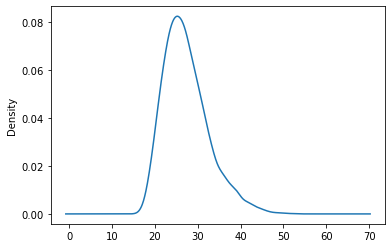

In [109]:
data['BMI'].plot.density()

We can formally check with a Shapiro-Wilk test:

In [111]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(data['BMI'])

# Set the significance level (alpha)
alpha = 0.05

print(f"Test statistic: {statistic:0.2f}")
print(f"P-value: {p_value:0.2f}")

# Check the p-value against the significance level
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")


Test statistic: 0.96
P-value: 0.00
Sample does not look Gaussian (reject H0)


**Word of Caution**: normality tests such as the Shapiro-Wilk test may reject the hypothesis of Gaussianity for any large sample (even if approximately Gaussian), so we should use this test with caution.

## Exercises
> 🧑‍💻 Exercise 1
> 
> Consider the sample of all passengers in the titanic dataset. Compute the mean age of all passengers. Then, compute the confidence bounds for this mean setting the confidence level to 0.95. Is the estimated mean a reliable estimate of the population mean?

> 🧑‍💻 Exercise 2
> 
> Consider the samples of all passengers in the titanic dataset. Compute the variance of the ages of all passengers. Then, compute the confidence bounds for this variance setting the confidence level to 0.95. Is the estimated variance a reliable estimate of the population variance?

> 🧑‍💻 Exercise 3
> 
> Extract the sample of values of Sex of passengers in second class in the titanic dataset. Compute the contingency table of absolute counts of the Sex column. Compute the confidence bounds for the proportions of Sex in the sample. Are the estimated bounds reliable? Repeat the analysis for class 1 and 3.

> 🧑‍💻 Exercise 4
> 
> The average age of women in the US population is 40. Run a statistical test to assess whether the sample of ages in the `infert` dataset has the same mean as the US population. What is the result of the test? Are women in `infert` younger or older than the average?
>
> You can load the dataset installing the `pydataset` library with `pip install pydataset` and then:
>
> `from pydataset import data; infert = data("infert")`

> 🧑‍💻 Exercise 5
> 
> Consider the `titanic` dataset. Follow these steps to assess that males and females **are not equally distributed**:
>
> * Obtain a table of absolute frequencies of the values of `Sex`;
> * Show a barplot comparing the proportions of male and female passengers. Do these look equally distributed?
> * Run a statistical test to assess whether the proportion of males and females are equal ($p=0.5$). What is the result of the test?
> * Run the statistical test setting $p=1/3$. Is the result different? Can we reject the null hypothesis? Why?



> 🧑‍💻 Exercise 6
> 
> Consider the samples of male and female passengers in the `titanic` dataset. Follow these steps to assess if the two populations related to the samples have significantly different ages:

> * Show a barplot to compare the average age of female and male passengers. Are the ages different? Which group contain the younger subjects?
> * Obtain two separate samples of the ages of males and females;
> * Run a t-test to check if the means of the populations related to the two samples are significantly different or not. Comment on the results of the test.

> 🧑‍💻 Exercise 7
> Consider the `titanic` dataset and study the relationship between the `Pclass` and `Survived` variables following these steps:
> 
> * Compute the contingency table of absolute frequencies of the two variables;
> * Compute the table of conditional probabilities $P(Survived|Pclass)$;
> * Show a stacked bar plot reporting the proportions between survived and non-survived passengers with respect to the `Pclass` variable;
> * Run a Pearson's Chi-Square test of independence to check if the differences in the observed proportions are statistically significant or not. Set the significance level to $0.95$.

> 🧑‍💻 Exercise 8
> Add a new `Old` column to the `titanic_train` dataframe. The values in the column should be $1$ if the value of `Age` is larger than the median value of all ages in the dataframe and $0$ otherwise. Study the influence of the variable `Sex` on the proportions of `Old` following these steps:
> 
> * Create a contingency table with the `Sex` variable on the rows and the `Old` variable on the columns;
> * Obtain a table of the conditional probabilities $P(Old|Sex)$. Are the proportions different in the groups defined by the `Sex` variable?
> * Show a stacked bar plot to display these proportions;
> * Run a Pearson's Chi-Squared test of independence to assess if the observed differences are statistically relevant.